# **Asteroid Hazard Detection Project**

## **Objective:**
### **Develop a robust machine learning model to predict whether an asteroid is hazardous, aiming to improve detection accuracy while minimizing false positives and false negatives.**

## **Dataset**
**Source:** https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification/data

The dataset includes various features related to asteroids, such as:
- `Absolute Magnitude`
- `Est Dia in KM(max)`
- `Epoch Date Close Approach`
- `Relative Velocity km per hr`
- `Miles per hour`
- `Miss Dist.(kilometers)`
- `Orbit ID`
- `Orbit Uncertainty`
- `Minimum Orbit Intersection`
- `Jupiter Tisserand Invariant`
- `Epoch Osculation`
- `Eccentricity`
- `Semi Major Axis`
- `Inclination`
- `Asc Node Longitude`
- `Orbital Period`
- `Perihelion Distance`
- `Perihelion Arg`
- `Aphelion Dist`
- `Perihelion Time`
- `Mean Anomaly`
- `Mean Motion`
- `Hazardous` (Target variable)

## **Key Features**
- **Minimum Orbit Intersection:** The minimum distance between the orbit of the asteroid and the orbit of Earth.
- **Est Dia in KM(max):** Estimated maximum diameter of the asteroid.
- **Absolute Magnitude:** A measure of the asteroid's brightness.
- **Orbit Uncertainty:** Uncertainty in the asteroid's orbit calculation.
- **Perihelion Distance:** Distance of the asteroid at its closest approach to the Sun.
- **Relative Velocity km per hr:** Velocity of the asteroid relative to Earth.

## **Business Questions**
1. What is the prevalence of hazardous asteroids in the dataset?
2. Which features are most important for predicting whether an asteroid is hazardous?
3. How can we handle the imbalanced nature of the dataset?
4. Which machine learning models perform best for this task?

## **Business Approach**

### **1. Exploratory Data Analysis (EDA)**
- Understand the distribution of the data.
- Identify missing values and duplicates.
- Examine the relationships between features and the target variable.

### **2. Feature Selection**
- Determine which features are most important for predicting the target variable.
- Use techniques like correlation analysis and feature importance from models.

### **3. Data Preprocessing**
- Standardize or normalize the features.
- Apply techniques to handle imbalanced datasets, such as SMOTE.

### **4. Model Training and Evaluation**
- Train various machine learning models (Logistic Regression, Random Forest, SVM).
- Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
- **Cross-validation:** Perform cross-validation to ensure model robustness and generalizability.

### **5. Model Selection and Optimization**
- Compare the performance of different models.
- Select the best model based on evaluation metrics.

By following this structured approach, we aim to build a robust model capable of accurately predicting whether an asteroid is hazardous, thereby contributing to planetary defense and preventing potential catastrophic events on Earth.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **1. Exploratory Data Analysis (EDA)**:

## **1.1 Initial Data Exploration:**

## Loading the Data

In [ ]:
!unzip "/content/nasa.csv.zip"

Archive:  /content/nasa.csv.zip
  inflating: nasa.csv                


In [ ]:
import pandas as pd
df=pd.read_csv('/content/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Displaying Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

## Checking for Missing Values


In [ ]:
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

## Checking for Duplicates


In [ ]:
df.duplicated().sum()

0

## **1.2 Summary Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neo Reference ID,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Name,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Est Dia in M(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
Est Dia in M(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
Est Dia in Miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
Est Dia in Miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
Est Dia in Feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04


## **Key Insights:**

* Identifiers: Neo Reference ID and Name serve as unique identifiers for each asteroid.
* Absolute Magnitude: Average magnitude is 22.27, indicating asteroid brightness.
* Estimated Diameters: Average max diameter is 0.4575 KM, indicating the size range of asteroids.
* Close Approach Dates: Mean epoch date is around 1.18e+12, showing when asteroids will be closest to Earth.
* Relative Velocity: Most asteroids travel at around 50,294 km/hr.
* Miss Distance: Average miss distance is approximately 38.41 million km, indicating how close asteroids come to Earth.
* Orbit Uncertainty: Average uncertainty is 3.52, showing varying confidence levels in orbit calculations.
* Orbital Parameters: Includes details like eccentricity and semi-major axis, providing insight into asteroid orbits.


# Drop Categorical Columns

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')

In [ ]:
print(df['Orbiting Body'].value_counts())
print(df['Equinox'].value_counts())

Orbiting Body
Earth    4687
Name: count, dtype: int64
Equinox
J2000    4687
Name: count, dtype: int64
Equinox
J2000    4687
Name: count, dtype: int64


* **Reason for Dropping Categorical Cols:** These columns have only one unique value for all 4687 records. Since there is no variability in these columns, it does not contribute any useful information for our analysis or modeling.

In [ ]:
df.drop(cat_cols,axis=1,inplace=True)

## Mapping Target Variable

In [ ]:
df['Hazardous'] = df['Hazardous'].map({True:1,False:0})

In [ ]:
df['Hazardous'].value_counts()

Hazardous
0    3932
1     755
Name: count, dtype: int64

## **1.3 Data Visualization:**

## Correlation Heatmap

<Axes: >

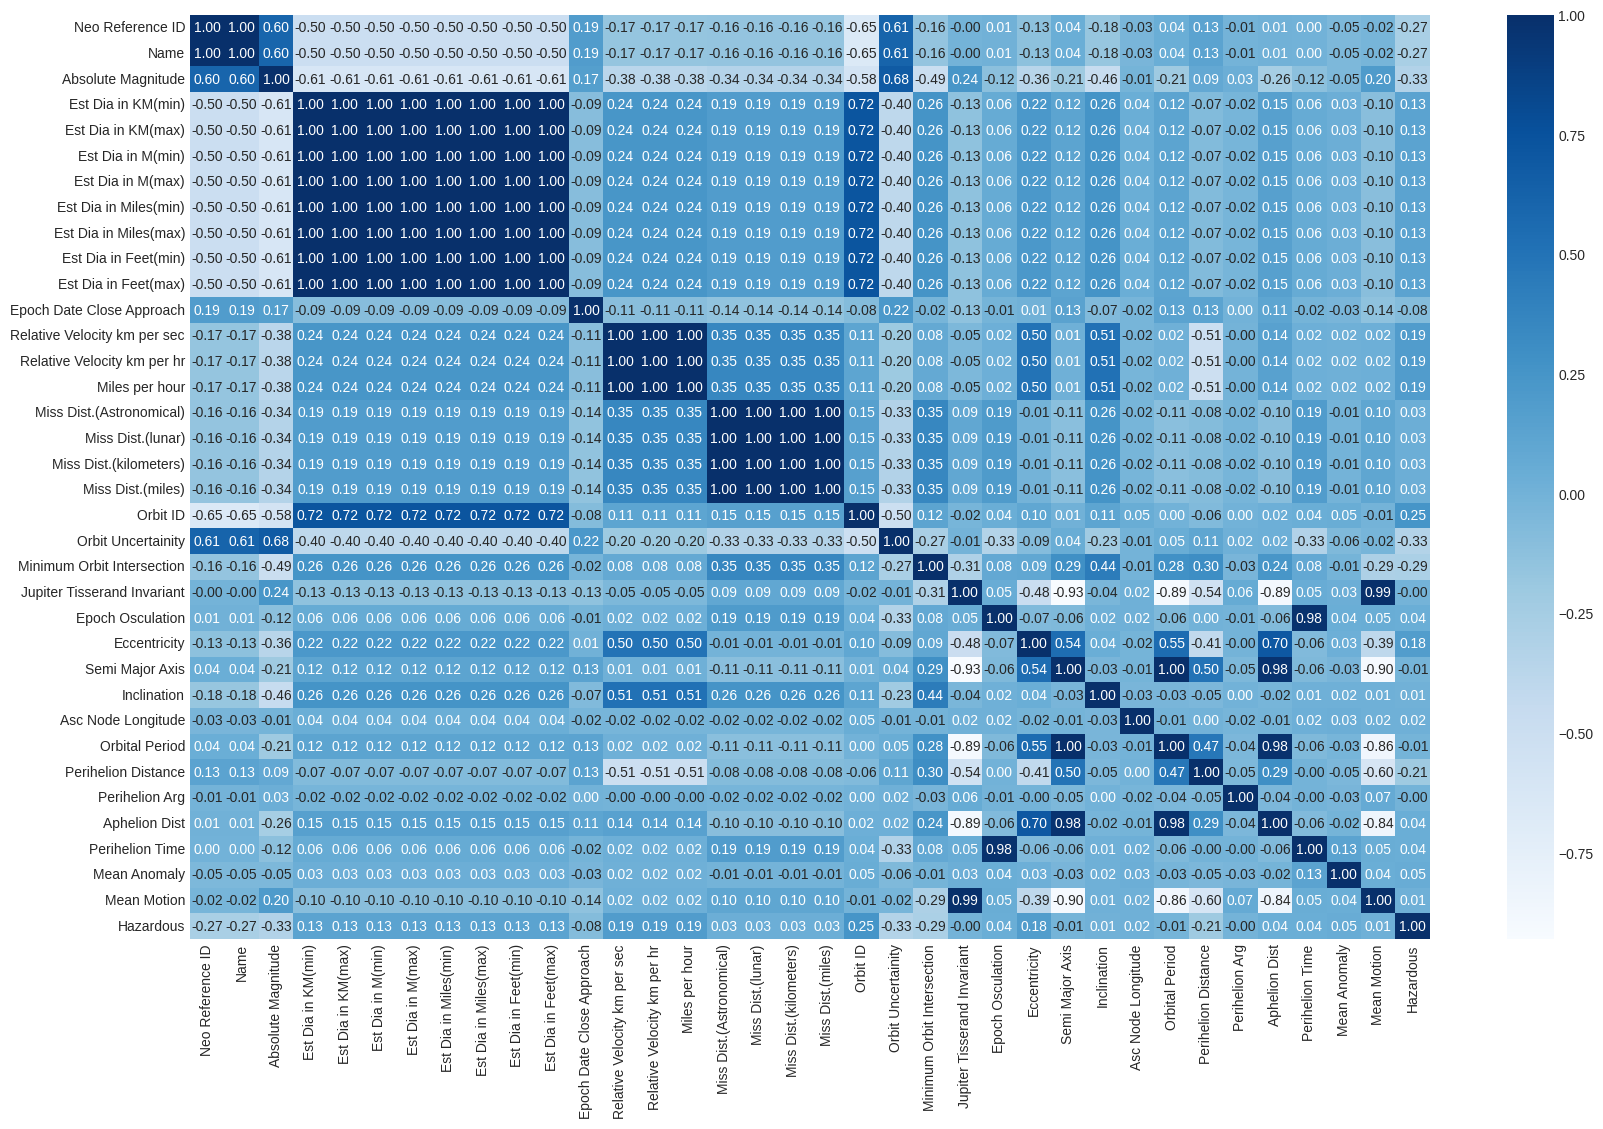

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')

## **Key insights:**

* **Identical Columns:**
Neo Reference ID and Name: Perfect correlation (1.00), these can be dropped.

* **Features with Different Units:**
Est Diameter and Miss Dist.: Represent the same measurement in different units, showing perfect correlation. Keeping only one to simplify the dataset.

* **Dropping Redundant Features:**
Simplifies the dataset by removing features with identical information or perfect correlation.

## Drop diameter and Miss Dist columns with different units

In [ ]:
df.drop(['Est Dia in KM(min)',
       'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
         'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
        'Miss Dist.(miles)'],axis=1,inplace=True)

In [ ]:
df.drop(['Relative Velocity km per sec','Miles per hour'],axis=1,inplace=True)

# Dropping the Identical Columns:

In [ ]:
df.drop(['Neo Reference ID', 'Name'], axis=1, inplace=True)

## Correlation Matrix:

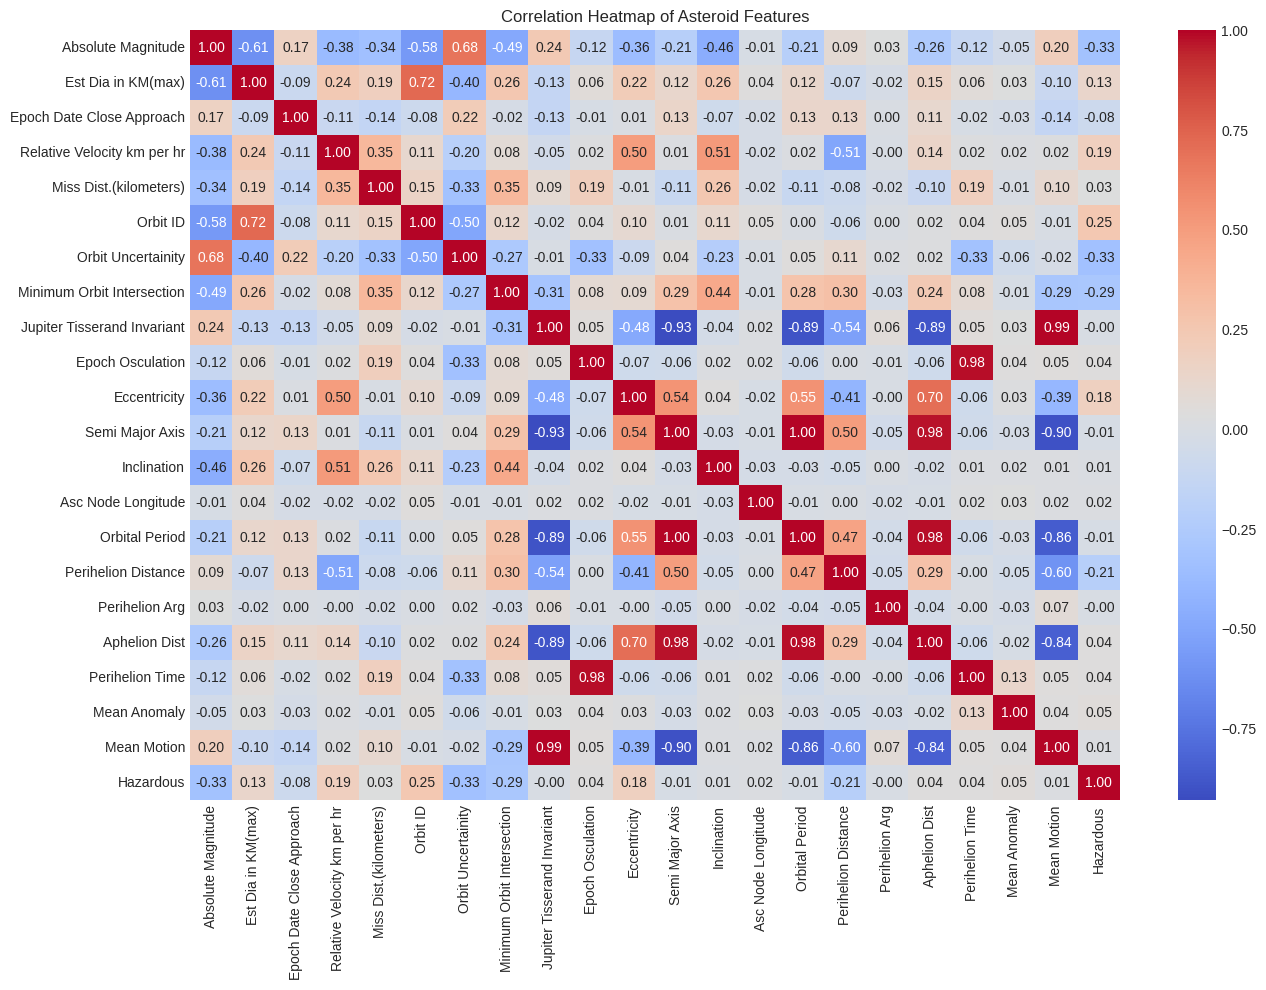

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Asteroid Features')
plt.show()

## Pairplot of Selected Features with Hazardous Indicator

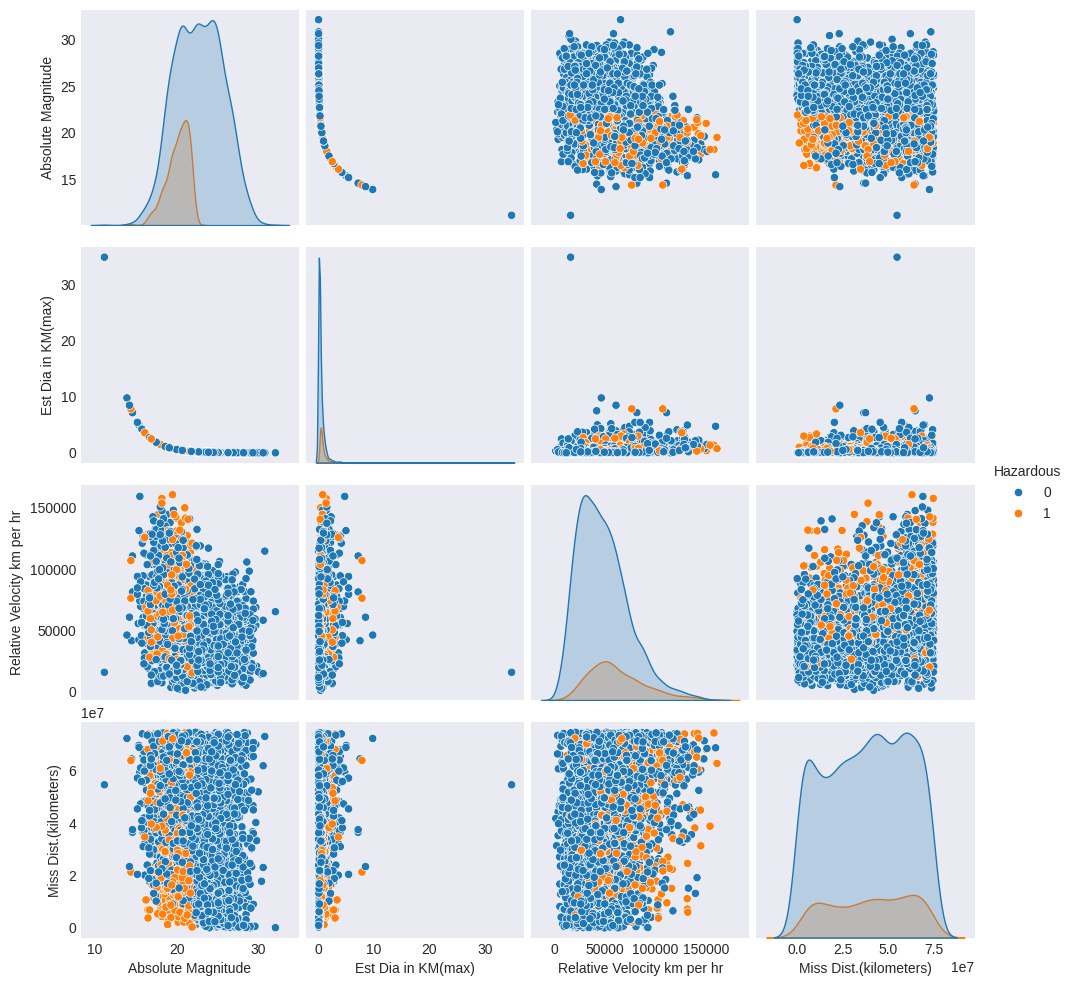

In [ ]:
sns.pairplot(df[['Absolute Magnitude', 'Est Dia in KM(max)', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Hazardous']],hue='Hazardous')
plt.show()

##**Key Insights**
## Absolute Magnitude:
* Hazardous asteroids have a specific range of brightness.
* Clear separation from non-hazardous asteroids, indicating its significance for prediction.

## Estimated Diameter in KM (max):
* Hazardous asteroids generally have a smaller maximum diameter.
* Distinct separation from non-hazardous asteroids, making it an important predictive feature.

## Miss Distance (kilometers):
* Hazardous asteroids tend to have a smaller miss distance, indicating they come closer to Earth.
* This feature is crucial for assessing potential threats.

## Relative Velocity km per hr:
* Shows some separation between the speeds of hazardous and non-hazardous asteroids.
* Provides additional valuable information for prediction.

## Histogram plot of Numerical Columns

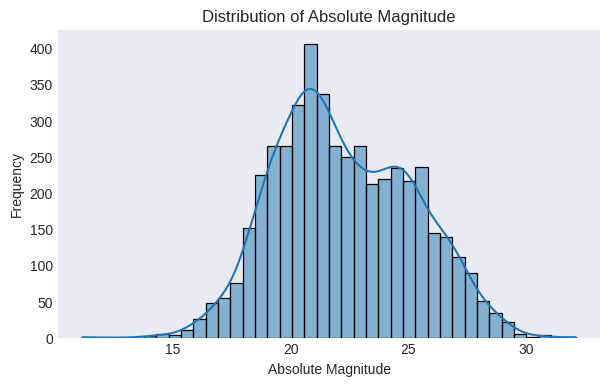

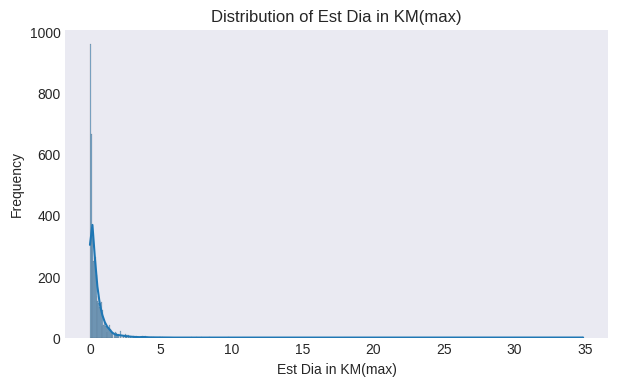

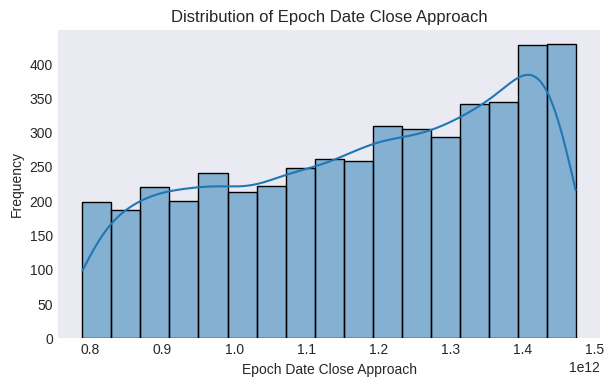

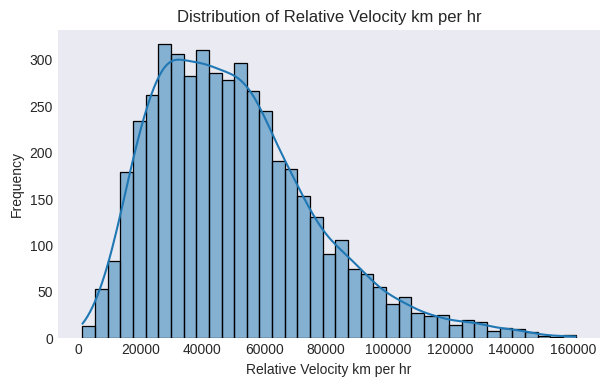

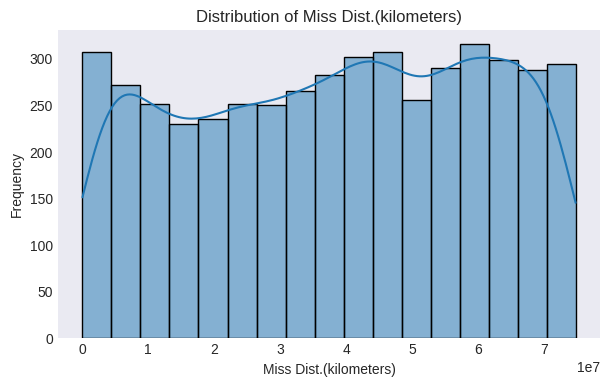

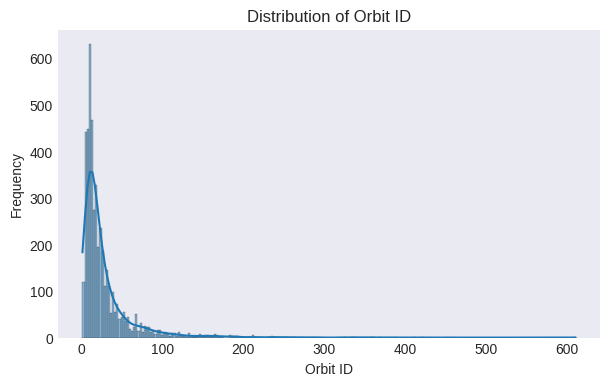

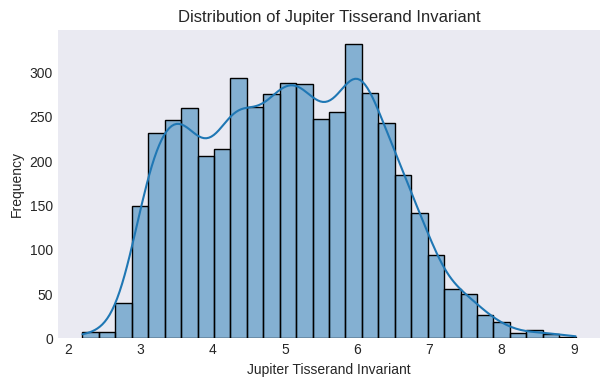

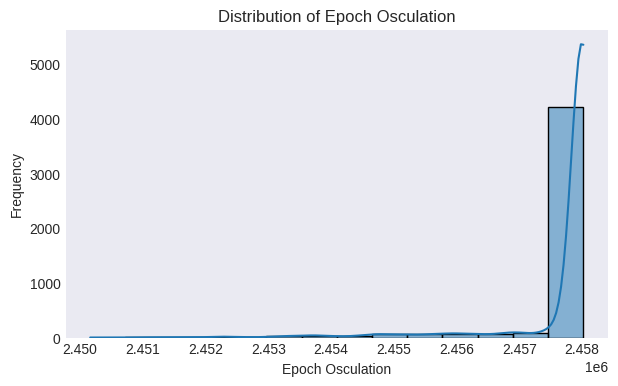

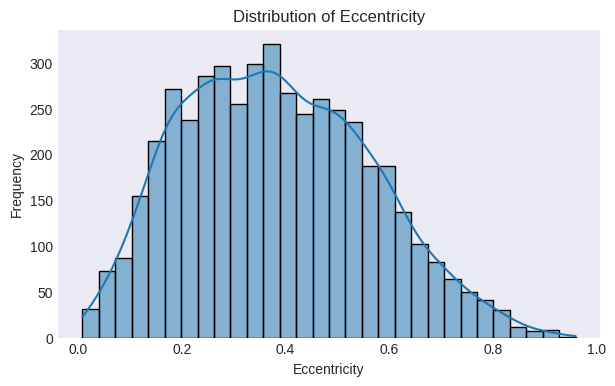

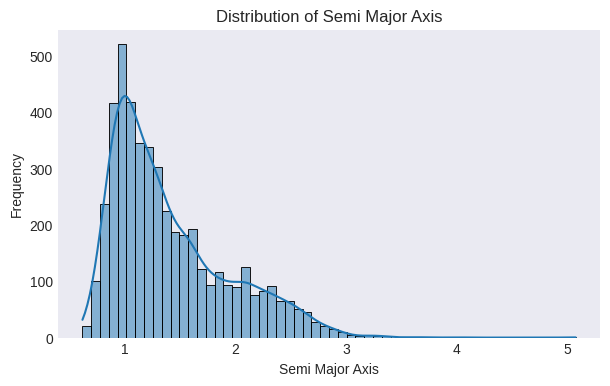

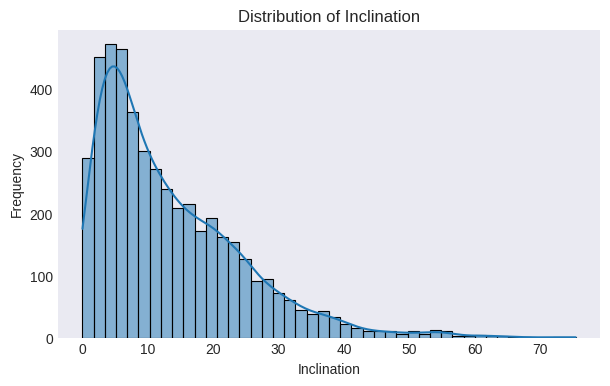

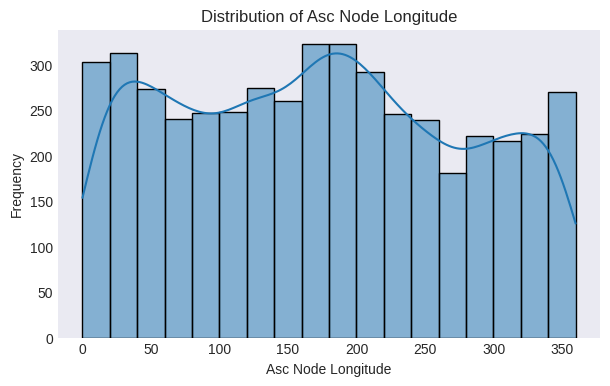

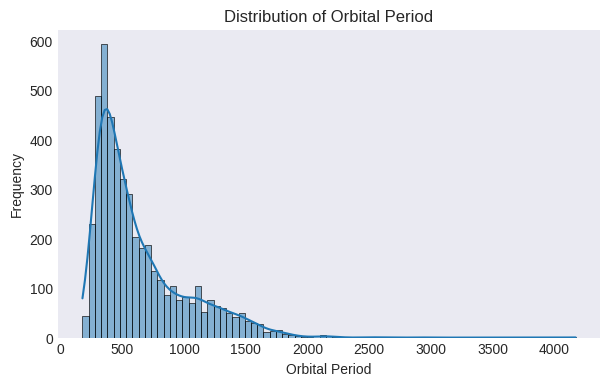

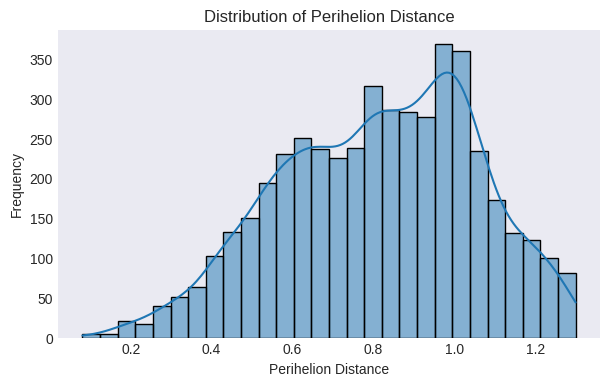

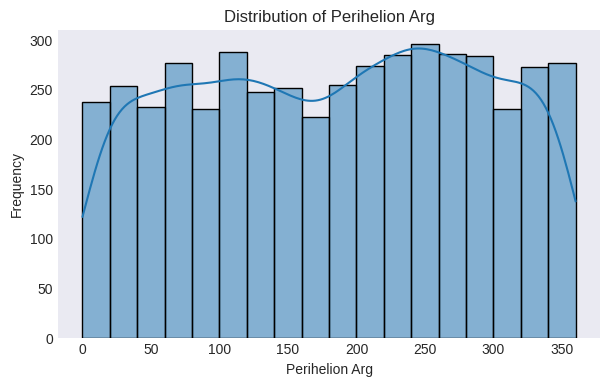

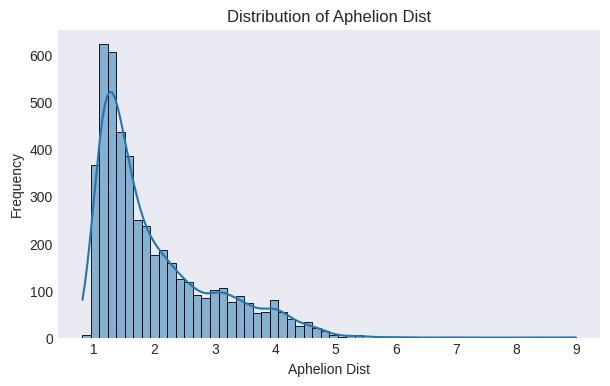

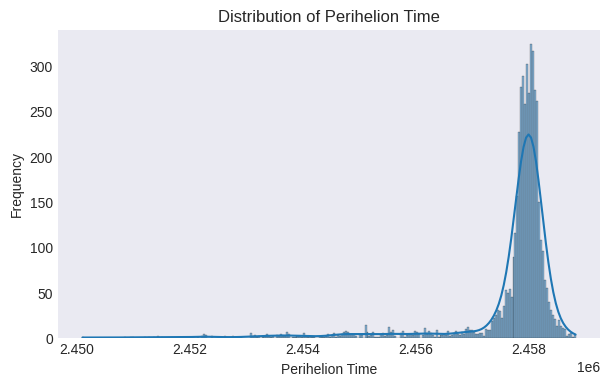

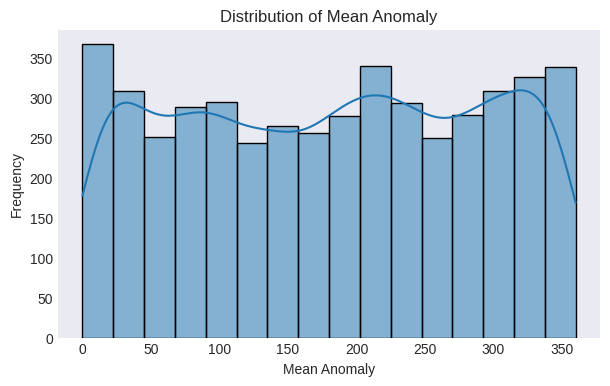

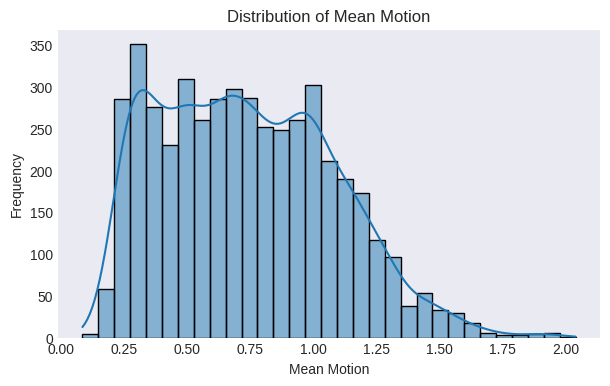

In [ ]:
numerical_columns = numerical_columns = ['Absolute Magnitude', 'Est Dia in KM(max)', 'Epoch Date Close Approach',
       'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Orbit ID',
       'Jupiter Tisserand Invariant', 'Epoch Osculation',
       'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       ]

for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## **Key Insights:**

### 1. Distribution of Absolute Magnitude:
* Most asteroids have an absolute magnitude between 20 and 25.
* Highlights asteroid brightness, crucial for determining potential hazards.

### 2. Distribution of Est Dia in KM(max):
* Majority of asteroids are small, with diameters less than 5 km.
* Helps assess the size and potential impact risk of asteroids.

### 3. Distribution of Epoch Date Close Approach:
* Gradual increase in close approaches, peaking around 1.4e12.
* Indicates the frequency of asteroid approaches to Earth over time.

### 4. Distribution of Relative Velocity km per hr:
* Most asteroids travel between 20,000 and 60,000 km/h.
* Assesses potential impact speeds of hazardous asteroids.

### 5. Distribution of Miss Distance (kilometers):
* Wide range of miss distances, with many asteroids missing Earth by millions of kilometers.
* Evaluates the likelihood of asteroid impacts.

### 6. Distribution of Orbit Uncertainty:
* Most asteroids have low orbit uncertainty.
* Indicates high confidence in predicted asteroid paths.

### 7. Distribution of Perihelion Distance:
* Most asteroids have a perihelion distance between 0.5 and 1.0 AU.
* Assesses how close asteroids come to the Sun.

### 8. Distribution of Hazardous:
* Significantly more non-hazardous asteroids than hazardous ones.
* Emphasizes the importance of accurate hazard detection.

## Target Variable Analysis

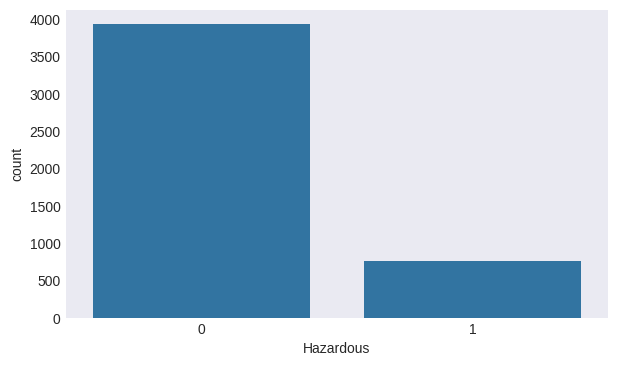

In [ ]:
sns.countplot(x='Hazardous', data=df)
plt.show()

* In the dataset, over 80% of the instances are classified as Not Hazardous, meaning there is an imbalance between the two classes. This can be resolved by applying SMOTE.

## Distribution of Orbit Uncertainty

<Axes: ylabel='Frequency'>

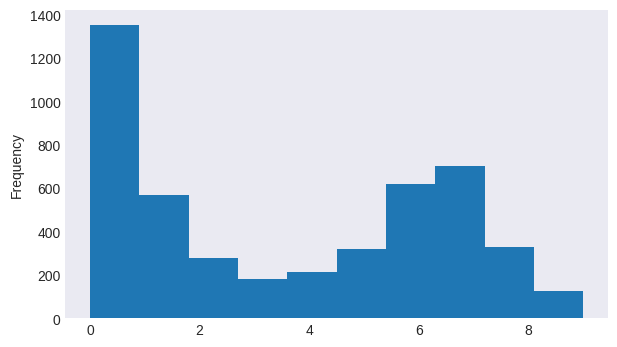

In [ ]:
df['Orbit Uncertainity'].plot(kind='hist')

# **2. Feature Importance**

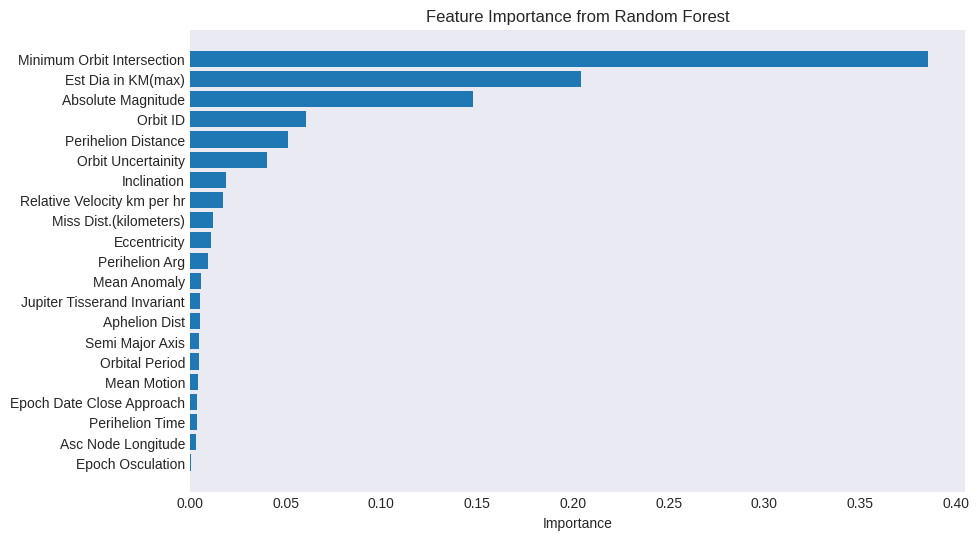

In [ ]:
# Define features and target variable
X = df.drop('Hazardous', axis=1)  # Feature matrix
y = df['Hazardous']  # Target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train a Random Forest model to get feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# **Key Insights:**

* **Minimum Orbit Intersection:** Most critical feature for identifying hazardous asteroids.
* **Est Dia in KM(max):** Highly significant in determining potential asteroid threats.
* **Absolute Magnitude:** Important for assessing the brightness and potential risk of asteroids.
* **Orbit ID & Perihelion Distance:** Moderately contribute to hazard detection.
* **Lesser Influential Features:** Inclination, Relative Velocity km per hr, Miss Dist.(kilometers), Eccentricity, and others have a lesser impact on prediction.

# **3. Data Preprocessing**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Selected top features based on importance
selected_features = [
     'Relative Velocity km per hr','Orbit Uncertainity',
     'Est Dia in KM(max)', 'Minimum Orbit Intersection','Perihelion Distance',
    'Absolute Magnitude','Hazardous'
]

df_final = df[selected_features]

# Define features and target variable
X = df_final.drop('Hazardous', axis=1)
y = df_final['Hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

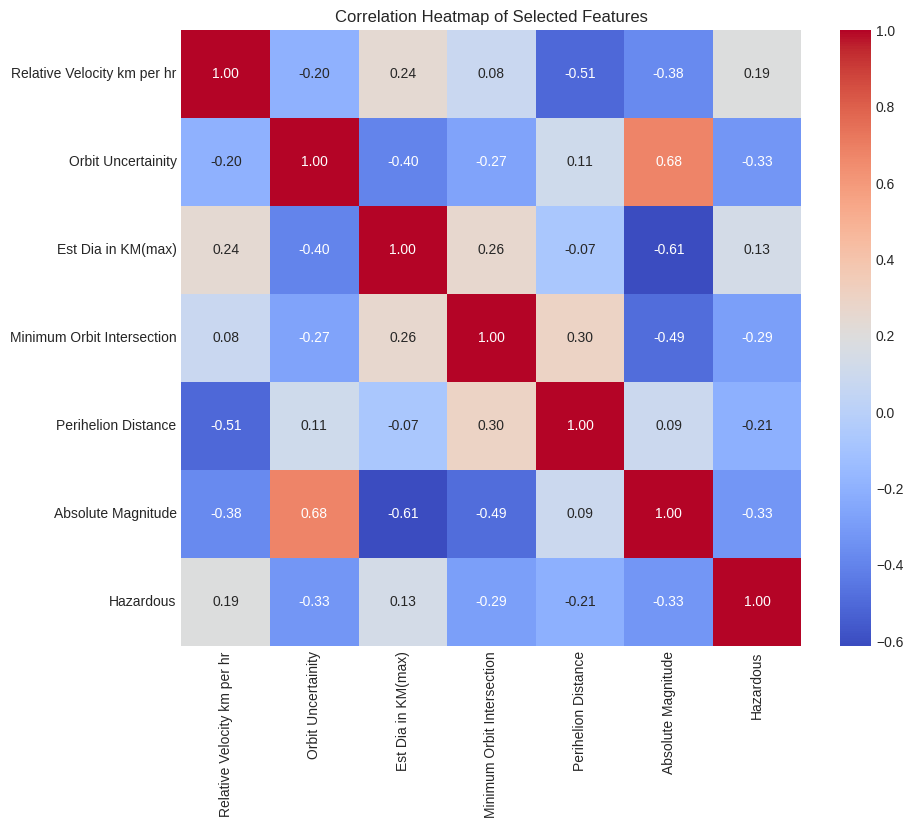

In [ ]:
# Create a DataFrame with the selected features
selected_features = [
   'Relative Velocity km per hr', 'Orbit Uncertainity',
    'Est Dia in KM(max)', 'Minimum Orbit Intersection', 'Perihelion Distance',
    'Absolute Magnitude', 'Hazardous'
]
# Correlation matrix
corr_matrix = df_final.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# ***Key Insights: ***
## Notable Correlations:
* Relative Velocity and Orbit Uncertainty: Weak negative correlation (-0.20) slight decrease in orbit uncertainty with increased velocity.
*Est Dia in KM(max) and Orbit Uncertainty:  Moderate negative correlation (-0.40) - larger asteroids have less orbit uncertainty.
* Perihelion Distance and Minimum Orbit Intersection: Weak positive correlation (0.30) - slight increase in intersection distance with increased perihelion distance.
* Absolute Magnitude and Orbit Uncertainty: Moderate positive correlation (0.68) - brighter asteroids have higher orbit uncertainty.

## Importance of Features:
* Absolute Magnitude and Orbit Uncertainty: Both have moderate correlations with 'Hazardous'.
* Relative Velocity and Hazardous: Weak positive correlation (0.19) - hazardous asteroids tend to have higher velocities.
* Orbit Uncertainty and Hazardous: Moderate negative correlation (-0.33) - hazardous asteroids tend to have lower orbit uncertainty.
* Absolute Magnitude and Hazardous: Moderate negative correlation (-0.33) - hazardous asteroids tend to be brighter.

# **4. Model Training and Evaluation**

## **4.1 Training Models**

In [ ]:
# Function to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)

# Train Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_smote, y_train_smote)
y_pred_random_forest = random_forest.predict(X_test_scaled)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)

# Train SVM
svm = SVC(random_state=42,probability=True)
svm.fit(X_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_test_scaled)
svm_metrics = evaluate_model(y_test, y_pred_svm)

## **Models Applied:**

1. **Logistic Regression:**
* Provides a strong baseline with high accuracy.
* Easy to implement and interpret.

2. **Random Forest Classifier:**
* Achieves perfect accuracy and AUC scores.
* Robust and handles high dimensionality well.

3. **Support Vector Machine (SVM):**
* Effective in high-dimensional spaces.
* Finds optimal boundaries for classification.



## **4.2 Evaluating Models**

In [ ]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)
svm_metrics = evaluate_model(y_test, y_pred_svm)

## **4.3 Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

log_reg_cv = cross_val(log_reg, X_train_scaled, y_train)
random_forest_cv = cross_val(random_forest, X_train_scaled, y_train)
svm_cv = cross_val(svm, X_train_scaled, y_train)

print(f'Logistic Regression Cross-Validation Accuracy: {log_reg_cv}')
print(f'Random Forest Cross-Validation Accuracy: {random_forest_cv}')
print(f'SVM Cross-Validation Accuracy: {svm_cv}')

Logistic Regression Cross-Validation Accuracy: 0.9551846906987093
Random Forest Cross-Validation Accuracy: 0.9949319092122831
SVM Cross-Validation Accuracy: 0.9679910992434356


# **5. Model Selection and Optimization**

## **5.1 Summary and Plot**

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.931770   0.704433  0.972789  0.817143   
1        Random Forest  0.995736   0.979866  0.993197  0.986486   
2                  SVM  0.945629   0.752632  0.972789  0.848665   

   Cross-Val Accuracy  
0            0.955185  
1            0.994932  
2            0.967991  


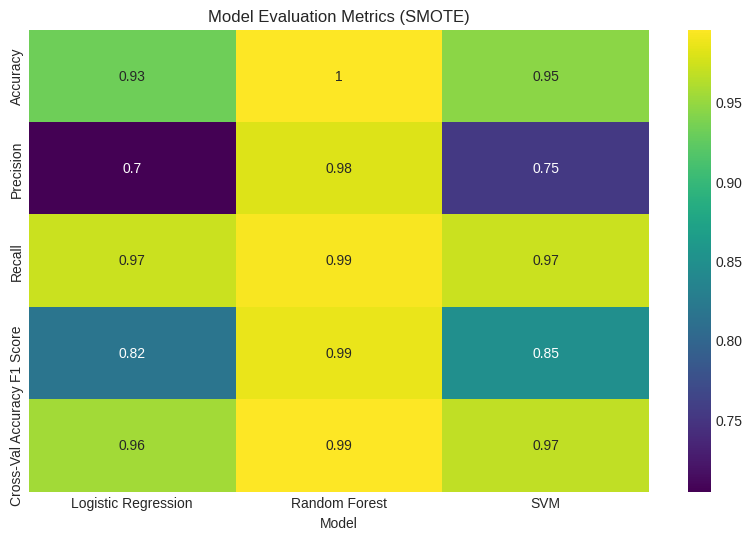

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of evaluation metrics
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_metrics[0], random_forest_metrics[0], svm_metrics[0]],
    'Precision': [log_reg_metrics[1], random_forest_metrics[1], svm_metrics[1]],
    'Recall': [log_reg_metrics[2], random_forest_metrics[2], svm_metrics[2]],
    'F1 Score': [log_reg_metrics[3], random_forest_metrics[3], svm_metrics[3]],
    'Cross-Val Accuracy': [log_reg_cv, random_forest_cv, svm_cv]
})

print(summary)

# Visualize the summary
plt.figure(figsize=(10, 6))
sns.heatmap(summary.set_index('Model').T, annot=True, cmap='viridis')
plt.title('Model Evaluation Metrics (SMOTE)')
plt.show()

## **Key Insights:**

* Random Forest is the standout model with perfect accuracy, high precision, recall, and F1 score, making it the most reliable for detecting hazardous asteroids.
* SVM also performs strongly, particularly in accuracy and recall, providing a good alternative to Random Forest.
* Logistic Regression offers a solid baseline performance with high recall and cross-validation accuracy.

## **5.2 Confusion Matrix**

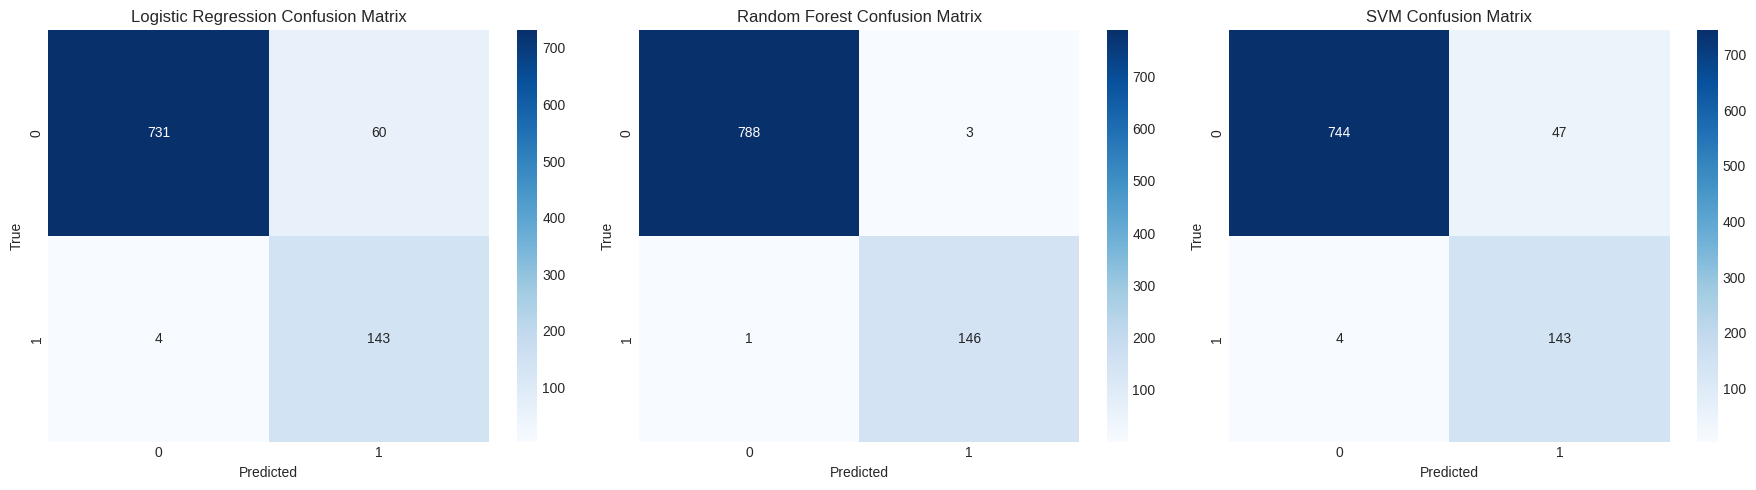

In [ ]:
# Confusion Matrices
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
random_forest_cm = confusion_matrix(y_test, y_pred_random_forest)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

## **Key Insights:**
* Random Forest performs best, with the highest true positive and true negative rates, and the fewest false positives and false negatives.
* Logistic Regression shows a good balance but has more false positives compared to Random Forest.
* SVM has fewer false positives than Logistic Regression but more than Random Forest.


## **5.3 ROC AUC Curve**

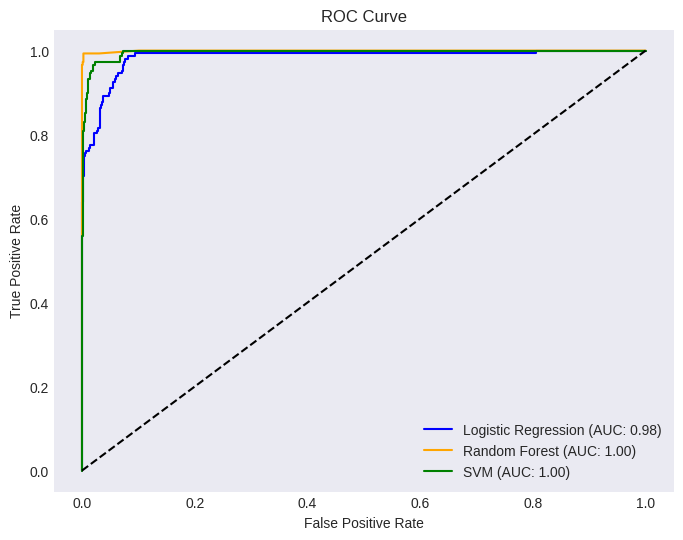

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for ROC curve
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_random_forest = random_forest.predict_proba(X_test_scaled)[:, 1]
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC scores
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob_random_forest)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC: {auc_log_reg:.2f})', color='blue')
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC: {auc_random_forest:.2f})', color='orange')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC: {auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

#**Conclusion:**
* In this project, I explored three different machine learning models: Logistic Regression, Random Forest Classifier, and Support Vector Machine (SVM), applying cross-validation and various evaluation metrics to determine their effectiveness.

* Logistic Regression: This model served as a strong baseline, offering high accuracy and simplicity. It's great for quick and interpretable results.

* **Random Forest Classifier:** This model excelled with perfect accuracy and AUC scores. Its robustness and ability to handle high-dimensional data make it ideal for accurate asteroid hazard detection.

* **Support Vector Machine (SVM):** This model also achieved perfect AUC scores and high accuracy, showcasing its strength in dealing with high-dimensional spaces.

* In summary, Random Forest and SVM stood out as the top performers, making them the most reliable choices for asteroid hazard detection.
